In [1]:
import os.path, sys
sys.path.append(os.path.join(os.path.expanduser('~'), 'Documents', 'My Programs', 'Python Library'))
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import therpy_working as tp

## Creating curve object

<class 'therpy_working.classes.Curve'>
A curve with 10 data points.


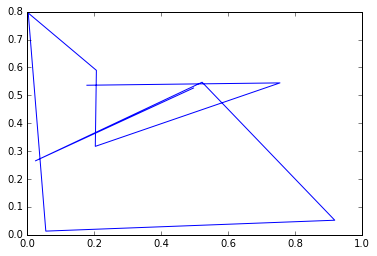

In [2]:
x = np.random.random(10)
y = np.random.random(10)

fx = tp.Curve(x,y)

print(type(fx))
print(fx)
plt.plot(*fx.data) # unpack data which returns tuple (x,y)

## Properties

In [3]:
print("the curve object's x and y have sizes:",fx.x.size,'and', fx.y.size)
print("the .data returns a tuple with x,y:",type(fx.data),'with length:',len(fx.data))
print("this makes it easy for plotting with the unpack operator *fx.data")

the curve object's x and y have sizes: 10 and 10
the .data returns a tuple with x,y: <class 'tuple'> with length: 2
this makes it easy for plotting with the unpack operator *fx.data


In [4]:
print('sort_index or sorti:',fx.sorti.size)
print(fx.x[0:4])
print(fx.x[fx.sorti][0:4])

sort_index or sorti: 10
[ 0.17836124  0.7549381   0.20341356  0.20664269]
[ 0.00310735  0.02451223  0.05559478  0.17836124]


## Methods

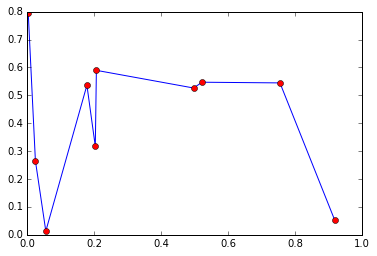

In [5]:
# Sort by x: returns tuple of sorted (x,y)
plt.plot(*fx.sortbyx())

fx_sort = tp.Curve(*fx.sortbyx())
plt.plot(*fx_sort.data,'ro')

In [6]:
# Calls
print('Funcation value near x = 0.4 is {:.2f}'.format(fx(0.4)))
print('Funcation value near x = 1.0 is {:.2f}'.format(fx(1)))
print('Funcation value near x = 0.2 is {:.2f}'.format(fx(0.2)))

Funcation value near x = 0.4 is 0.53
Funcation value near x = 1.0 is 0.05
Funcation value near x = 0.2 is 0.32


## Fitting

In [7]:
def gaussian(x, amp, x0, sigma, offset):
    return amp * np.exp( - (x-x0)**2 / (2*sigma**2) ) + offset

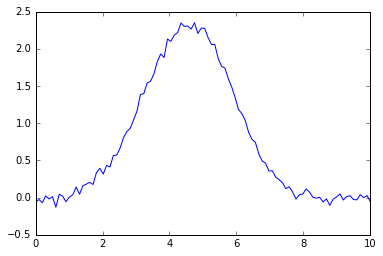

In [14]:
# Create fake noisy data
x = np.linspace(0,10,100)
y = gaussian(x, 2.34534, 4.57, 1.34, -0.029)
y += np.random.normal(loc=0, scale=0.05, size=y.shape)
c = tp.Curve(x, y)
plt.plot(*c.data)

##______Fit Value______Error______
 0 ==>     2.371 (+-)   0.01434
 1 ==>     4.571 (+-)  0.008237
 2 ==>      1.32 (+-)   0.01087
 3 ==>  -0.03033 (+-)  0.009064


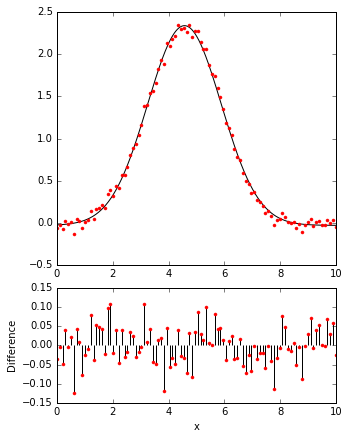

In [15]:
# Fit the gaussian function
(fitres,fiterr) = c.fit(gaussian, [1, 5, 1, 0], plot=True, pts=1000)

# Development

### Find index of xi in array x

In [10]:
# Explained version
def locx_full(x,xi):
    imin = np.argwhere(x<=xi) 
    if len(imin) > 0: imin = imin[-1,0] # Last element smaller than
    else: return 0
    imax = np.argwhere(x>xi)
    if len(imax) > 0: imax = imax[0,0] # First element larger than
    else: return x.size - 1
    # Nearest neighbor
    dist_left = xi-x[imin]
    dist_right = x[imax]-xi
    if dist_left < dist_right: iloc = imin
    else: iloc = imax
    return iloc
# Shorter, faster version
def locx(x,xi):
    iloc = np.argwhere(x<=xi)
    if len(iloc) == 0: return 0
    elif len(iloc) == x.size: return x.size - 1
    else: iloc = iloc[-1,0]
    if (xi-x[iloc]) >= (x[iloc+1]-xi): iloc += 1
    return iloc


In [11]:
x = np.linspace(0,10,11)
print('x = ',x)

xi = -1
print('Location of {:.1f} is index {:.1f}'.format(xi,locx(x,xi)))
xi = 3.9
print('Location of {:.1f} is index {:.1f}'.format(xi,locx(x,xi)))
xi = 4
print('Location of {:.1f} is index {:.1f}'.format(xi,locx(x,xi)))
xi = 4.1
print('Location of {:.1f} is index {:.1f}'.format(xi,locx(x,xi)))
xi = 4.4
print('Location of {:.1f} is index {:.1f}'.format(xi,locx(x,xi)))
xi = 4.5
print('Location of {:.1f} is index {:.1f}'.format(xi,locx(x,xi)))
xi = 4.6
print('Location of {:.1f} is index {:.1f}'.format(xi,locx(x,xi)))
xi = 11
print('Location of {:.1f} is index {:.1f}'.format(xi,locx(x,xi)))

x =  [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.]
Location of -1.0 is index 0.0
Location of 3.9 is index 4.0
Location of 4.0 is index 4.0
Location of 4.1 is index 4.0
Location of 4.4 is index 4.0
Location of 4.5 is index 5.0
Location of 4.6 is index 5.0
Location of 11.0 is index 10.0
